In [8]:
%matplotlib notebook

import matplotlib.pyplot as plt
import sympy as sp
from Klassen import *

# Beginn der Verarbeitung
## Einlesen der Messdaten
Seit 2018 werden die Einschaltzeiten der Heizung und der jeweilige Ölverbrauch aufgezeichnet. Das objekt datareader liest mit der Methode *read_and split* die Messpunkte aus einer .csv .

In [9]:
datareader = InPackage()
data = datareader.get_data()

## Jahresmenge

In [11]:
fig = plt.figure()
years = sorted(data.keys())
plt.bar(years, [data[year]['t']/3600/24 for year in years])
plt.title('Gemessene Heizzeit in Tage')
plt.grid()
plt.xlabel('Jahr')
plt.show()

<IPython.core.display.Javascript object>

# Leistung anhand der Maschinendaten
Hier wird die gemessene Zeit direkt mit der Brennerleistung multipliziert, um zur verbrauchten Energie zu kommen. Später wird die Messzeit statistisch abgeglichen. Dabei werden Ausfalltage einzelner jahre mit äuivalenten Messdaten anderer Jahre ersetzt.
Die so erhaltene wahre Zeit kann zu einer reevaluierung der Brennerleistung verwendet werden.

In [12]:
# Vergleich mit Kenndaten
Wirkungsgrad = 0.852
leistung = 70000  # WE
leistung = leistung / 860  # umrechnung in kW

print("Leistung aus Kenndaten: " + str(round(leistung, 1)) + "kW")
##################################################################################
# Vergleich mit Ölstand

Vol_Öl = 15 * 30 * (13.7 - 6.85)  # in l
Heitzwert = 10.9  # kWh/l
Energie_Öl = Vol_Öl * Heitzwert  # kWh
Energie_nutz = Energie_Öl * Wirkungsgrad # kWh/l


Leistung aus Kenndaten: 81.4kW


In [13]:
fig, ax1 = plt.subplots()
years = sorted(data.keys())
t_fac = 1/3600/24
ax1.bar(years, [data[year]['t']*t_fac for year in years])
e_fac = leistung/3600/1000/t_fac
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Zeit in Tage')
mn, mx = ax1.get_ylim()
ax2 = ax1.twinx()
ax2.set_ylim(mn*e_fac, mx*e_fac)
ax2.set_yticks(np.linspace(ax1.get_yticks()[0]*e_fac,ax1.get_yticks()[-1]*e_fac,len(ax1.get_yticks())))
plt.title('Jahresverbrauch')
ax1.grid()
plt.show()

<IPython.core.display.Javascript object>

## Monatsmenge

In [14]:
year_month_matrix = sp.zeros(len(years), 12)
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        m_time = data[year][month]['t']/3600
        year_month_matrix[i-1, j-1] = m_time
        plt.bar(month, m_time, alpha=0.2)
plt.title('gemessene Heizdauer in Stunden')
plt.xlabel('Monat')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

In [15]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        m_time = leistung * data[year][month]['t']/3600
        plt.bar(month, m_time, alpha=0.2)
plt.title('Energiemenge in kWh')
plt.xlabel('Monat')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

## Tagesmenge

In [16]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        for day in data[year][month].keys():
            if day == 't':
                continue
            m_time = data[year][month][day]['t']/3600
            plt.scatter(x=month*31+day, y=m_time, alpha=0.9)
plt.title('Tägliche Heizzeit in h')
plt.xlabel('Tage')
plt.xlim((1, 365))
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

In [17]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        for day in data[year][month].keys():
            if day == 't':
                continue
            m_time = leistung * data[year][month][day]['t']/3600
            plt.scatter(x=month*31+day, y=m_time, alpha=0.9)

plt.title('Energiemenge in kWh')
plt.xlabel('Tage')
plt.xlim((1, 365))
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


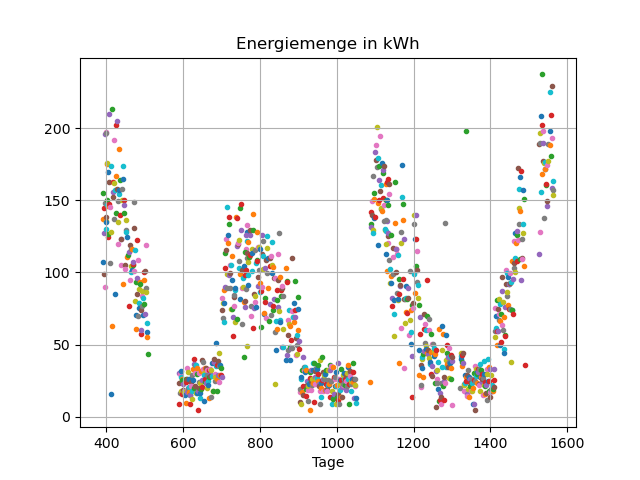

In [13]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        for day in data[year][month].keys():
            if day == 't':
                continue
            m_time = leistung * data[year][month][day]['t']/3600
            plt.scatter(x=365*i+month*31+day, y=m_time, marker='.')

plt.title('Energiemenge in kWh')
plt.xlabel('Tage')
plt.grid()
plt.show()